# Two Fluid Solution

## Presets

We preset it with $\gamma_e = \gamma_i = 5/3$, $\beta_\parallel = 1$, $\beta_\perp = 1.2$  for each of i, e (of course these are adjustable). 

In [1]:
from wave_instab_showcase.physics.plasma_anistotropic import PlasmaInfo, TwoComponentAnisotropicPlasma
import numpy as np


# One could try to change this.
the_plasma_info_e = PlasmaInfo(
    beta_para=1.0,
    beta_perp=1.2,
    gamma_para=5.0/3,
    gamma_perp=5.0/3
)
the_plasma_info_i = PlasmaInfo(
    beta_para=1.0,
    beta_perp=1.2,
    gamma_para=5.0/3,
    gamma_perp=5.0/3
)

# Also one could play with the va and b0.
va = 1.0
b0 = np.array((0.0, 0.0, 1.0))

the_plasma = TwoComponentAnisotropicPlasma(the_plasma_info_e, the_plasma_info_i, va, b0)

## Try with a $\mathbf k$ with the angle of $80^\circ$

In [2]:
the_angle = np.deg2rad(80.0)
k = 1.0 * np.array((np.cos(the_angle), 0.0, np.sin(the_angle)))

# Try to make a table
the_format = '{:5} {:15} {:150}'
print(the_format.format('#', 'omega', 'polarity'))
the_modes = the_plasma.get_modes(k)
instabilies_detected = []

for i, mode in enumerate(the_modes):
    wave = mode.to_planar_wave()
    omega = wave.get_omega
    pol = wave.get_unit_energy_oscillation

    print(the_format.format(
        i + 1,
        np.array2string(omega, precision=4),
        np.array2string(pol, precision=2, suppress_small=True)))

    if isinstance(omega, complex) and omega.imag > 0:
        instabilies_detected.append(i)

if len(instabilies_detected) > 0:
    print(f'Instabilities detected, with subs = {instabilies_detected}')
else:
    print('No instabilities')

#     omega           polarity                                                                                                                                              
    1 -0.6129+0.9698j [ 0.28+0.44j -0.6 +0.j   -0.03-0.03j -0.  -0.j   -0.  +0.01j  0.01-0.04j
 -0.  -0.j    0.19-0.3j   0.19-0.3j   0.17-0.17j  0.17-0.17j]                
    2 -0.6129-0.9698j [ 0.28-0.44j -0.6 -0.j   -0.03+0.03j -0.  +0.j   -0.  -0.01j  0.01+0.04j
 -0.  +0.j    0.19+0.3j   0.19+0.3j   0.17+0.17j  0.17+0.17j]                
    3 1.2604+0.j      [-0.45+0.j -0.52+0.j -0.31+0.j -0.  +0.j -0.04+0.j  0.24+0.j -0.  +0.j
 -0.33+0.j -0.33+0.j -0.28+0.j -0.28+0.j]                                      
    4 1.0482+0.j      [ 0.2 +0.j  0.32+0.j -0.62+0.j -0.  +0.j -0.1 +0.j  0.59+0.j -0.  +0.j
  0.18+0.j  0.18+0.j  0.16+0.j  0.16+0.j]                                      
    5 -1.0828+0.j     [-0.06+0.j -0.07+0.j  0.73+0.j -0.  +0.j -0.12+0.j  0.66+0.j -0.  +0.j
  0.05+0.j  0.05+0.j  0.04+0.j  0.04+0.j] 

## Make a Brazil plot

We use $\beta_\parallel$ from 0.1 to 10.0. The value applies to each type. 
Also, we use $A = \beta_\perp / \beta_\parallel$ also from 0.1 to 10.0. 

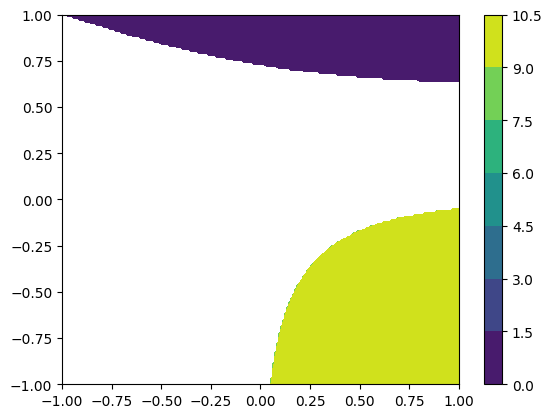

In [18]:
n_beta = 201
beta_parallel = np.linspace(np.log10(0.1), np.log10(10.0), n_beta)
n_big_a = 201
big_a = np.linspace(np.log10(0.1), np.log10(10.0), n_big_a)
res_gamma = np.empty((n_beta, n_big_a))
mesh_x, mesh_y = np.meshgrid(beta_parallel, big_a, indexing='ij')

theta_to_compute = np.deg2rad(30.0)
k_to_compute = 1.0 * np.array((np.sin(theta_to_compute), 0.0, np.cos(theta_to_compute)))

def take_max_gamma(eigs: np.ndarray):
    if (not isinstance(eigs, np.ndarray)) or (not np.iscomplexobj(eigs)):
        return -np.inf
    res = np.log10(np.max(np.imag(eigs) / (np.abs(np.real(eigs)) + 1e-10)))
    return res if res > 0.3 else -np.inf


for i in range(n_beta):
    beta_para_val = 10.0 ** beta_parallel[i]
    for j in range(n_big_a):
        big_a_val = 10.0 ** big_a[j]
        the_plasma_info = PlasmaInfo(
            beta_para_val, beta_para_val * big_a_val,
            1.33, 0.69)
        the_plasma_in_question = TwoComponentAnisotropicPlasma(the_plasma_info, the_plasma_info, va, b0)
        the_eigs = the_plasma_in_question.eig_vals(k_to_compute)
        res_gamma[i, j] = take_max_gamma(the_eigs)


import matplotlib.pyplot as plt

plt.contourf(mesh_x, mesh_y, res_gamma, levels=None)
plt.colorbar()


Now we can check out mirror mode (purple) and Firehose instability (yellow). 